# Y0~18 사이 상관관계 구하기
https://dacon.io/competitions/official/235584/codeshare/707

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./data/train.csv', encoding = 'utf-8', header = 1)
test = pd.read_csv('./data/test.csv', encoding = 'utf-8')

In [3]:
train.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


In [4]:
target = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08','Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18']
train[target].head()

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


In [7]:
test.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,4752,18.7,987.4,1.5,1.3,0.0,1006.8,987.7,21.1,1007.5,...,91.4,17.5,19.2,1007.6,0.0,194.7,0.0,84.0,59.9,0.0
1,4753,18.8,987.4,1.1,1.2,0.0,1006.7,987.7,21.2,1007.5,...,91.6,17.4,19.1,1007.5,0.0,173.1,0.0,84.0,60.5,0.0
2,4754,19.0,987.4,1.3,1.2,0.0,1006.6,987.6,21.2,1007.4,...,92.0,17.2,19.0,1007.5,0.0,208.6,0.0,85.0,60.8,0.0
3,4755,18.7,987.4,2.3,0.8,0.0,1006.6,987.6,21.1,1007.4,...,93.0,17.2,18.8,1007.4,0.0,185.0,0.0,85.8,61.2,0.0
4,4756,18.4,987.4,1.1,0.7,0.0,1006.7,987.7,20.9,1007.5,...,92.3,17.4,18.9,1007.5,0.0,162.8,0.0,87.3,61.7,0.0


In [8]:
## 1) Y18이 null => Y0 ~ Y17은 not null
temp = train[train['Y18'].isnull()]

In [9]:
temp.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


In [18]:
print(temp)

        id   X00    X01  X02  X03  X04     X05    X06   X07     X08  ...  Y09  \
4320  4320  19.3  987.7  0.9  2.2  0.0  1007.7  988.0  20.8  1007.8  ...  NaN   
4321  4321  19.0  987.6  1.9  2.2  0.0  1007.7  988.0  20.6  1007.8  ...  NaN   
4322  4322  19.1  987.6  2.0  1.4  0.0  1007.8  988.1  20.5  1007.9  ...  NaN   
4323  4323  19.2  987.7  1.8  1.5  0.0  1007.9  988.1  20.5  1007.9  ...  NaN   
4324  4324  19.2  987.8  1.4  1.4  0.0  1007.9  988.1  20.5  1007.8  ...  NaN   
...    ...   ...    ...  ...  ...  ...     ...    ...   ...     ...  ...  ...   
4747  4747  19.9  987.6  0.9  0.8  0.0  1006.9  987.7  21.7  1007.5  ...  NaN   
4748  4748  19.9  987.6  0.5  0.7  0.0  1006.8  987.7  21.6  1007.5  ...  NaN   
4749  4749  19.7  987.7  0.9  0.6  0.0  1006.9  987.6  21.4  1007.4  ...  NaN   
4750  4750  19.4  987.7  0.9  0.8  0.0  1006.9  987.8  21.3  1007.6  ...  NaN   
4751  4751  19.1  987.6  1.0  0.3  0.0  1006.8  987.8  21.2  1007.5  ...  NaN   

      Y10  Y11  Y12  Y13  Y

In [10]:
print(temp.iloc[:,-19:-1].isnull().any())

Y00    False
Y01    False
Y02    False
Y03    False
Y04    False
Y05    False
Y06    False
Y07    False
Y08    False
Y09    False
Y10    False
Y11    False
Y12    False
Y13    False
Y14    False
Y15    False
Y16    False
Y17    False
dtype: bool


In [11]:
## 2) Y0 ~ Y17이 null => Y18은 not null
temp = train[~train['Y18'].isnull()]

In [12]:
print(temp.iloc[:,-19:-1].isnull().any())

Y00    True
Y01    True
Y02    True
Y03    True
Y04    True
Y05    True
Y06    True
Y07    True
Y08    True
Y09    True
Y10    True
Y11    True
Y12    True
Y13    True
Y14    True
Y15    True
Y16    True
Y17    True
dtype: bool


In [13]:
#Y18이 not null인 데이터(즉, y18의 3일치 데이터)
train[~train['Y18'].isnull()]['Y18']

4320    20.5
4321    20.5
4322    20.5
4323    20.5
4324    20.5
        ... 
4747    21.5
4748    21.5
4749    21.5
4750    21.5
4751    21.0
Name: Y18, Length: 432, dtype: float64

In [14]:
#index 새로 부여한 데이터 생성
y18 = train[~train['Y18'].isnull()]['Y18'].reset_index(drop= True)

In [15]:
print(y18)

0      20.5
1      20.5
2      20.5
3      20.5
4      20.5
       ... 
427    21.5
428    21.5
429    21.5
430    21.5
431    21.0
Name: Y18, Length: 432, dtype: float64


In [16]:
#Y18이 비어있는 30일간의 Y0~Y17
no_y18_target = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08','Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17']
no_y18 = train[(train['Y18'].isnull()) & (train['id'] > 3887)][no_y18_target].reset_index(drop = True)

In [17]:
print(no_y18)

      Y00   Y01   Y02   Y03   Y04   Y05   Y06   Y07   Y08   Y09   Y10   Y11  \
0    20.5  20.5  20.5  25.5  25.5  19.5  18.5  19.0  19.5  17.5  18.5  17.5   
1    20.0  20.5  20.5  25.5  25.5  19.5  18.5  19.0  19.5  17.0  18.0  17.5   
2    20.0  20.0  20.5  25.5  25.5  19.5  18.0  19.0  19.0  17.0  18.0  17.0   
3    20.0  20.0  20.0  25.5  25.0  19.5  18.0  19.0  19.0  17.0  18.0  17.0   
4    19.5  20.0  20.0  25.0  25.0  19.5  18.0  18.5  19.0  17.0  17.5  17.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
427  22.0  22.5  22.5  26.0  26.0  21.0  20.0  20.5  20.5  19.5  20.0  19.0   
428  22.0  22.5  22.5  26.0  25.5  21.0  20.0  20.5  20.5  19.5  20.0  19.0   
429  21.5  22.5  22.5  26.0  25.5  21.0  20.0  20.5  20.5  19.5  20.0  19.0   
430  21.5  22.0  22.0  25.5  25.5  20.5  20.0  20.0  20.0  19.5  20.0  18.5   
431  21.5  22.0  22.0  25.5  25.5  20.5  19.5  20.0  20.0  19.5  20.0  18.5   

      Y12   Y13   Y14   Y15   Y16   Y17  
0    18.5

In [28]:
#3일치와 30일치를 concat함.
check_target = pd.concat([no_y18, y18], axis = 1)

In [ ]:
print(type(check_target))

In [29]:
check_target.head()

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,20.5,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.5,18.5,17.5,18.5,18.0,17.5,17.0,18.5,17.0,20.5
1,20.0,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.0,18.0,17.5,18.5,17.5,17.5,17.0,18.0,17.0,20.5
2,20.0,20.0,20.5,25.5,25.5,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.5,17.5,17.0,18.0,17.0,20.5
3,20.0,20.0,20.0,25.5,25.0,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.0,17.0,17.0,18.0,16.5,20.5
4,19.5,20.0,20.0,25.0,25.0,19.5,18.0,18.5,19.0,17.0,17.5,17.0,18.0,17.0,17.0,17.0,18.0,16.5,20.5


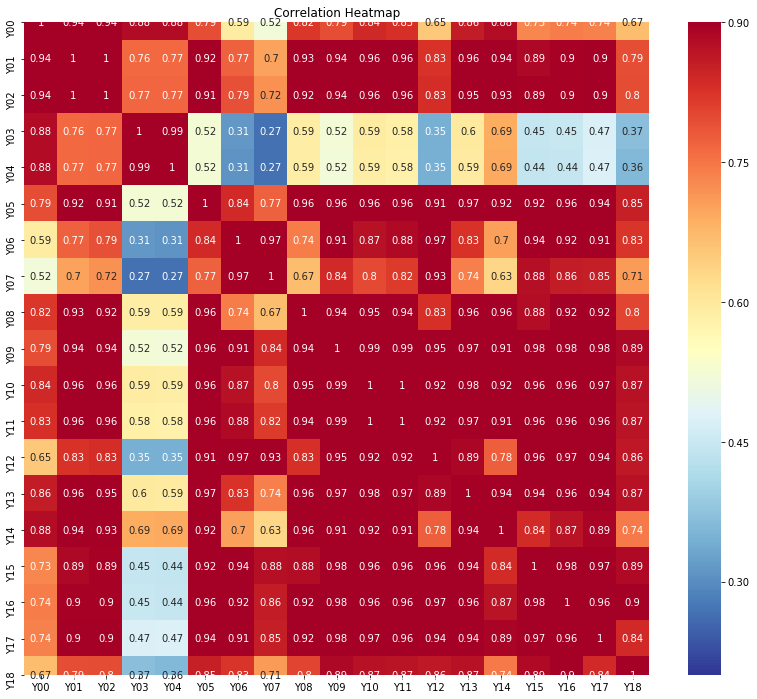

In [30]:
correlations =  check_target.corr()
plt.figure(figsize = (14, 12))

# Heatmap of correlations
sns.heatmap(correlations, cmap = plt.cm.RdYlBu_r,  vmin = 0.2, annot = True, vmax = 0.9)
plt.title('Correlation Heatmap');

Y18과 Y3, Y4는 상관성이 매우 낮아보임
Y18과 가장 높은 상관을 보이는 것은 Y16(1등), Y9와 Y15(2등), Y10과 Y11과 Y13(3등) 순서임

In [31]:
check_target.reset_index(inplace = True)

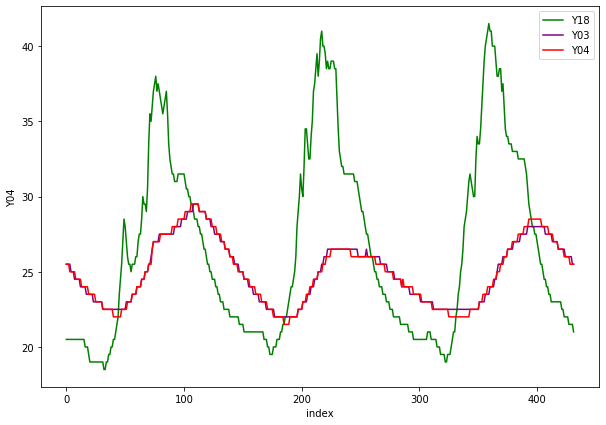

In [32]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=check_target, x='index', y='Y18', color='green', ax=ax)
sns.lineplot(data=check_target, x='index', y='Y03', color='purple', ax=ax)
sns.lineplot(data=check_target, x='index', y='Y04', color='red', ax=ax)
plt.legend(['Y18', 'Y03', 'Y04'])
plt.show()

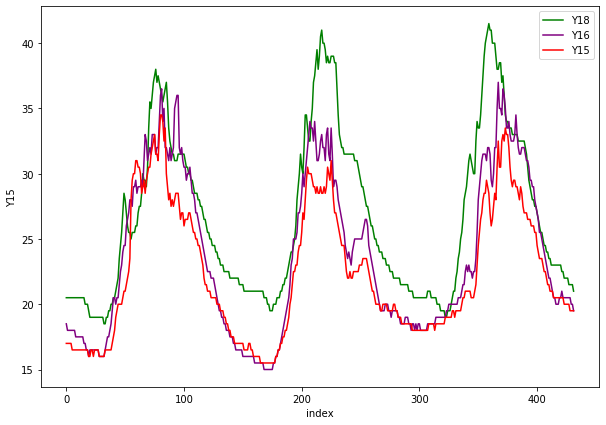

In [33]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=check_target, x='index', y='Y18', color='green', ax=ax)
sns.lineplot(data=check_target, x='index', y='Y16', color='purple', ax=ax)
sns.lineplot(data=check_target, x='index', y='Y15', color='red', ax=ax)
plt.legend(['Y18', 'Y16', 'Y15'])
plt.show()

Plot으로 다시 한번 확인 가능

# Transfer Learning 하기
https://dacon.io/competitions/official/235584/codeshare/731

In [1]:
from tqdm import tqdm
import random
import tensorflow as tf
import os

In [3]:
print(tf.__version__)
print(tf.test.is_gpu_available())

1.13.1
False


In [4]:
# 재생산성을 위해 시드 고정
np.random.seed(7)
random.seed(7)
tf.set_random_seed(7)

In [5]:
train = pd.read_csv('./data/train.csv', encoding = 'utf-8', header = 1, index_col = 'id')
test = pd.read_csv('./data/test.csv', encoding = 'utf-8', index_col = 'id')

In [6]:
train.describe()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,...,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,432.000000
mean,20.227904,988.621107,1.509764,1.453157,1.270223,1008.333902,989.005093,21.658081,1008.790341,1008.394171,...,22.222801,23.737269,24.649653,23.641898,20.926157,21.319444,21.564468,22.969097,23.381829,26.687500
std,4.707570,3.359916,1.071858,0.936151,4.429852,3.395037,3.403714,4.377216,3.520317,3.546180,...,9.112299,10.599000,12.214870,8.400081,6.106031,7.066149,6.810084,8.054272,9.275172,6.286621
min,8.300000,977.300000,0.000000,0.000000,0.000000,997.200000,978.100000,11.600000,997.300000,996.300000,...,3.500000,4.000000,3.000000,6.000000,7.500000,7.500000,7.000000,6.000000,7.000000,18.500000
25%,16.900000,986.800000,0.700000,0.800000,0.000000,1006.500000,987.100000,18.400000,1006.700000,1006.300000,...,15.500000,15.500000,15.000000,17.000000,16.500000,16.500000,16.500000,16.500000,16.000000,21.000000
50%,19.900000,988.600000,1.300000,1.300000,0.000000,1008.500000,989.100000,21.200000,1008.800000,1008.400000,...,20.000000,20.500000,21.000000,22.000000,19.500000,19.500000,20.000000,21.500000,20.000000,25.000000
75%,24.100000,991.000000,2.100000,2.000000,0.000000,1010.800000,991.600000,24.825000,1011.400000,1010.900000,...,30.500000,32.500000,34.500000,30.500000,25.000000,25.000000,27.000000,30.000000,32.000000,31.500000
max,30.900000,997.200000,10.200000,5.800000,25.600000,1016.800000,997.400000,32.700000,1017.500000,1018.000000,...,42.000000,49.000000,53.000000,43.500000,38.000000,42.500000,40.500000,41.500000,43.500000,41.500000


In [7]:
test.describe()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
count,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,...,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000
mean,25.145625,987.616693,1.401033,1.479436,2.396016,1006.869314,987.839045,26.032352,1007.321424,1006.938741,...,76.208698,24.544392,24.519905,1007.319826,8.480451,172.389991,2.266267,79.336875,71.271146,2.332856
std,3.824374,4.624002,1.376209,1.087042,6.382526,4.757237,4.637961,3.513596,4.788943,4.777357,...,15.845644,4.040956,4.021288,4.778875,8.997879,109.130854,8.564625,14.861512,15.016123,6.591677
min,15.500000,970.300000,0.000000,0.000000,0.000000,990.000000,971.300000,17.300000,990.500000,989.200000,...,25.800000,14.200000,15.100000,990.900000,0.000000,0.000000,0.000000,27.500000,22.800000,0.000000
25%,22.300000,985.300000,0.400000,0.700000,0.000000,1004.400000,985.500000,23.300000,1004.900000,1004.500000,...,64.400000,21.500000,21.400000,1004.800000,0.000000,73.100000,0.000000,68.600000,60.700000,0.000000
50%,25.300000,987.900000,1.100000,1.300000,0.000000,1007.200000,988.100000,26.100000,1007.700000,1007.300000,...,79.800000,24.500000,24.500000,1007.600000,5.715000,178.800000,0.000000,82.100000,72.000000,0.000000
75%,27.600000,990.700000,2.000000,2.000000,0.700000,1010.000000,991.000000,28.300000,1010.500000,1010.100000,...,90.200000,27.200000,27.300000,1010.400000,15.860000,261.400000,0.100000,92.725000,84.300000,0.500000
max,36.300000,998.100000,11.000000,10.900000,46.500000,1018.000000,998.500000,36.000000,1018.500000,1017.900000,...,97.200000,35.300000,35.800000,1018.400000,31.640000,359.900000,97.700000,96.800000,95.900000,79.500000


In [8]:
# 기상청 데이터만 추출
X_train = train.loc[:,'X00':'X39']

# standardization을 위해 평균과 표준편차 구하기
MEAN = X_train.mean()
STD = X_train.std()

# 표준편차가 0일 경우 대비하여 1e-07 추가 
X_train = (X_train - MEAN) / (STD + 1e-07)

In [9]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [10]:
# RNN 모델에 입력 할 수 있는 시계열 형태로 데이터 변환 
def convert_to_timeseries(df, interval):
    sequence_list = []
    target_list = []
    
    for i in tqdm(range(df.shape[0] - interval)):
        sequence_list.append(np.array(df.iloc[i:i+interval,:-1]))
        target_list.append(df.iloc[i+interval,-1])
    
    sequence = np.array(sequence_list)
    target = np.array(target_list)
    
    return sequence, target

토론 글에 기반하여, Y15와 Y16 지점의 데이터가 Y18과 상관관계가 높음. 그래서 두 지점의 데이터를 학습하기로 결정.

In [11]:
y_columns = ['Y11','Y15','Y16']

In [12]:
# t시점 이전 120분(2시간)의 데이터로 t시점의 온도를 추정할 수 있는 학습데이터 형성
sequence = np.empty((0, 12, 40))
target = np.empty((0,))
for column in y_columns :
    
    concat = pd.concat([X_train, train[column]], axis = 1)

    _sequence, _target = convert_to_timeseries(concat.head(12*30), interval = 12)

    sequence = np.vstack((sequence, _sequence))
    target = np.hstack((target, _target))

100%|██████████████████████████████████████████████████████████████████████████████| 348/348 [00:00<00:00, 3710.70it/s]


In [13]:
# convert_to_timeseries 함수를 쓰기 위한 dummy feature 생성
X_train['dummy'] = 0

In [14]:
# train set에서 도출된 평균과 표준편차로 standardization 실시 
test = (test - MEAN) / (STD + 1e-07)

In [15]:
# convert_to_timeseries 함수를 쓰기 위한 dummy feature 생성
test['dummy'] = 0

In [16]:
# train과 test 기간을 합쳐서 1440분 간격으로 학습데이터 재구축
X_test, _ = convert_to_timeseries(pd.concat([X_train, test], axis = 0), interval=12)

100%|██████████████████████████████████████████████████████████████████████████| 16260/16260 [00:05<00:00, 3186.15it/s]


In [17]:
# test set 기간인 후반부 80일에 맞게 자르기 
X_test = X_test[-11520:, :, :]

In [18]:
# 만들어 두었던 dummy feature 제거
X_train.drop('dummy', axis = 1, inplace = True)
test.drop('dummy', axis = 1, inplace = True)

In [19]:
print(type(X_train))
print(type(test))
print(X_train)
print(test)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
           X00       X01       X02       X03       X04       X05       X06  \
id                                                                           
0    -2.236377  0.053243 -0.288997 -0.911345 -0.286742  0.284562  0.174782   
1    -2.321347  0.083006  0.177482  0.477320 -0.286742  0.284562  0.174782   
2    -2.300105  0.112769 -0.382293  0.904602 -0.286742  0.255107  0.204162   
3    -2.300105  0.083006 -0.009110 -0.804525 -0.286742  0.255107  0.174782   
4    -2.342589  0.083006 -0.662181  0.263679 -0.286742  0.255107  0.204162   
...        ...       ...       ...       ...       ...       ...       ...   
4747 -0.069655 -0.303908 -0.568885 -0.697704 -0.286742 -0.422352 -0.383432   
4748 -0.069655 -0.303908 -0.942069 -0.804525 -0.286742 -0.451807 -0.383432   
4749 -0.112139 -0.274146 -0.568885 -0.911345 -0.286742 -0.422352 -0.412812   
4750 -0.175867 -0.274146 -0.568885 -0.697704 -0.286742 -0.422352 -

In [47]:
# 간단한 lstm 모델 구축하기 
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape=sequence.shape[-2:]),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mse')

In [48]:
# loss가 4미만으로 떨어지면 학습 종료 시키는 기능
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if(logs.get('loss') < 4):
            print('\n Loss is under 4, cancelling training')
            self.model.stop_training = True

In [49]:
callbacks = myCallback()

In [50]:
# 모델 학습
simple_lstm_model.fit(    
    sequence, target,
    epochs=60,
    batch_size=128,
    verbose=2,
    shuffle=False,
    callbacks = [callbacks]
)

Epoch 1/60
 - 2s - loss: 429.9020
Epoch 2/60
 - 0s - loss: 172.5104
Epoch 3/60
 - 0s - loss: 84.4298
Epoch 4/60
 - 0s - loss: 31.3182
Epoch 5/60
 - 0s - loss: 25.7958
Epoch 6/60
 - 0s - loss: 18.2615
Epoch 7/60
 - 0s - loss: 15.5566
Epoch 8/60
 - 0s - loss: 15.2531
Epoch 9/60
 - 0s - loss: 13.0221
Epoch 10/60
 - 0s - loss: 13.7739
Epoch 11/60
 - 0s - loss: 12.6485
Epoch 12/60
 - 0s - loss: 12.9775
Epoch 13/60
 - 0s - loss: 12.5011
Epoch 14/60
 - 0s - loss: 12.6167
Epoch 15/60
 - 0s - loss: 12.3903
Epoch 16/60
 - 0s - loss: 12.4014
Epoch 17/60
 - 0s - loss: 12.2798
Epoch 18/60
 - 0s - loss: 12.2508
Epoch 19/60
 - 0s - loss: 12.1716
Epoch 20/60
 - 0s - loss: 12.1373
Epoch 21/60
 - 0s - loss: 12.0832
Epoch 22/60
 - 0s - loss: 12.0467
Epoch 23/60
 - 0s - loss: 12.0055
Epoch 24/60
 - 0s - loss: 11.9719
Epoch 25/60
 - 0s - loss: 11.9336
Epoch 26/60
 - 0s - loss: 11.9017
Epoch 27/60
 - 0s - loss: 11.8692
Epoch 28/60
 - 0s - loss: 11.8410
Epoch 29/60
 - 0s - loss: 11.8125
Epoch 30/60
 - 0s - l

In [20]:
# LSTM 레이어는 고정
simple_lstm_model.layers[0].trainable = False

NameError: name 'simple_lstm_model' is not defined

In [21]:
# fine tuning 할 때 사용할 학습데이터 생성 (Y18)
finetune_X, finetune_y = convert_to_timeseries(pd.concat([X_train.tail(432), train['Y18'].tail(432)], axis = 1), interval=12)

100%|██████████████████████████████████████████████████████████████████████████████| 420/420 [00:00<00:00, 2447.77it/s]


In [22]:
print(type(finetune_X))
print(finetune_X)

<class 'numpy.ndarray'>
[[[-0.19710891 -0.27414579 -0.56888529 ...  0.92595219  1.05732766
   -0.2345759 ]
  [-0.26083605 -0.30390844  0.36407402 ...  0.94643647  1.14443432
   -0.2345759 ]
  [-0.23959367 -0.30390844  0.45736995 ...  0.97204181  1.18254349
   -0.2345759 ]
  ...
  [-0.30332082 -0.27414579 -0.2889975  ...  0.97716288  1.23698515
   -0.2345759 ]
  [-0.30332082 -0.30390844  0.45736995 ...  0.97716288  1.28053848
   -0.2345759 ]
  [-0.34580558 -0.33367108 -0.2889975  ...  0.97204181  1.31320348
   -0.2345759 ]]

 [[-0.26083605 -0.30390844  0.36407402 ...  0.94643647  1.14443432
   -0.2345759 ]
  [-0.23959367 -0.30390844  0.45736995 ...  0.97204181  1.18254349
   -0.2345759 ]
  [-0.21835129 -0.27414579  0.27077809 ...  0.97204181  1.22609682
   -0.2345759 ]
  ...
  [-0.30332082 -0.30390844  0.45736995 ...  0.97716288  1.28053848
   -0.2345759 ]
  [-0.34580558 -0.33367108 -0.2889975  ...  0.97204181  1.31320348
   -0.2345759 ]
  [-0.4307751  -0.33367108 -0.10240563 ...  0.972

In [23]:
print(type(finetune_y))
print(finetune_y)

<class 'numpy.ndarray'>
[20.5 20.5 20.5 20.5 20.  20.  20.  19.5 19.  19.  19.  19.  19.  19.
 19.  19.  19.  19.  19.  19.  18.5 18.5 19.  19.  19.5 19.5 20.  20.
 20.5 20.5 21.  21.5 22.  23.5 24.5 25.5 27.  28.5 28.  27.  26.  25.5
 25.5 25.  25.5 25.5 25.5 26.  26.  27.  27.5 27.5 28.5 30.  29.5 29.5
 29.  30.5 33.5 35.5 35.  36.  37.  37.5 38.  37.  37.5 37.  36.5 36.
 35.5 36.  36.5 37.  35.5 33.5 32.5 32.  31.5 31.5 31.  31.  31.  31.5
 31.5 31.5 31.5 31.5 31.5 31.  30.5 30.5 30.  30.  29.5 29.5 29.  28.5
 28.5 28.5 28.  28.  27.5 27.5 27.  26.5 26.5 26.  25.5 25.5 25.  25.
 24.5 24.5 24.5 24.  24.  23.5 23.5 23.  23.  23.  22.5 22.5 22.5 22.5
 22.5 22.  22.  22.  22.  22.  22.  22.  22.  21.5 21.5 21.5 21.5 21.
 21.  21.  21.  21.  21.  21.  21.  21.  21.  21.  21.  21.  21.  21.
 21.  21.  20.5 20.5 20.5 20.  20.  19.5 19.5 19.5 20.  20.  20.  20.5
 20.5 20.5 21.  21.  21.5 21.5 22.  22.  22.5 23.  23.5 24.  24.  24.5
 25.  26.  28.  29.  30.  31.5 30.5 30.  32.  34.5 34.5 33.

In [24]:
print(finetune_X.shape)

(420, 12, 40)


In [25]:
print(finetune_y.shape)

(420,)


In [53]:
# LSTM 레이어는 고정 시켜두고, DNN 레이어에 대해서 fine tuning 진행 (Transfer Learning)
finetune_history = simple_lstm_model.fit(
            finetune_X, finetune_y,
            epochs=12,
            batch_size=64,
            shuffle=False,
            verbose = 2)

Epoch 1/12
 - 0s - loss: 147.2486
Epoch 2/12
 - 0s - loss: 39.7507
Epoch 3/12
 - 0s - loss: 14.1236
Epoch 4/12
 - 0s - loss: 14.4046
Epoch 5/12
 - 0s - loss: 7.0295
Epoch 6/12
 - 0s - loss: 7.0386
Epoch 7/12
 - 0s - loss: 4.4418
Epoch 8/12
 - 0s - loss: 4.2121
Epoch 9/12
 - 0s - loss: 3.5054
Epoch 10/12
 - 0s - loss: 2.9446
Epoch 11/12
 - 0s - loss: 2.6878
Epoch 12/12
 - 0s - loss: 2.2843


In [54]:
# 예측하기 
finetune_pred = simple_lstm_model.predict(X_test)

In [56]:
# 제출 파일 만들기
submit4 = pd.DataFrame({'id':range(144*33, 144*113),
              'Y18':finetune_pred.reshape(1,-1)[0]})

In [57]:
submit4.to_csv('relu_2hours_y111516_result.csv', index = False)

In [58]:
submit4.head()

,id,Y18
0,4752,20.337397
1,4753,21.334251
2,4754,21.379862
3,4755,20.753119
4,4756,20.826822


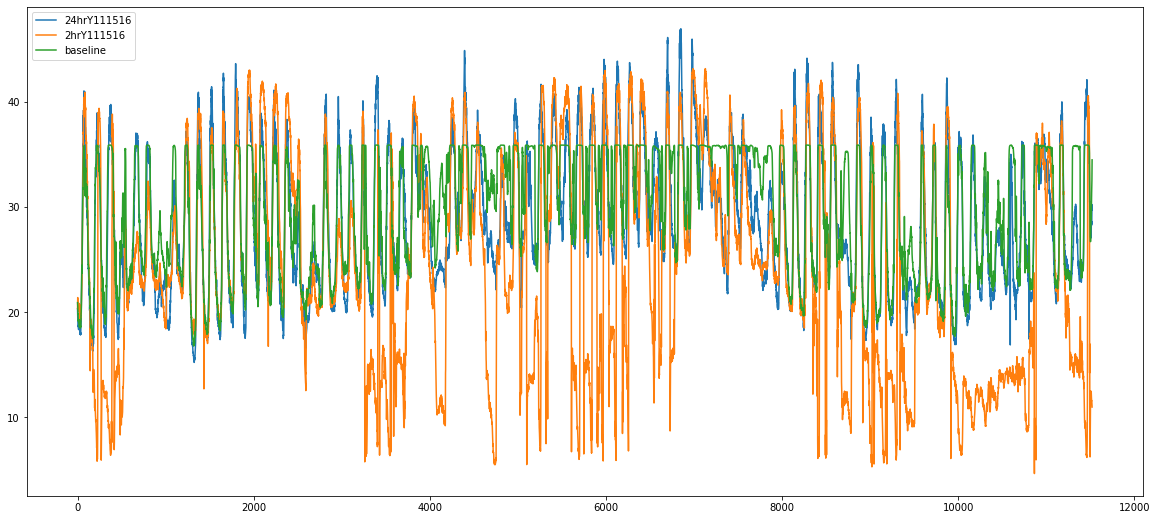

In [60]:
fig, ax = plt.subplots(figsize=(20, 9))
#plt.plot(submit['Y18'])
plt.plot(submit3['Y18'])
plt.plot(submit4['Y18'])
plt.plot(baseline['Y18'])
plt.legend(['24hrY111516', '2hrY111516','baseline'], loc='upper left')
plt.show()

In [30]:
baseline = pd.read_csv('baseline_result.csv')

In [31]:
baseline.head()

,id,Y18
0,4752,20.900927
1,4753,20.762854
2,4754,20.665445
3,4755,20.459698
4,4756,19.955067


In [55]:
X_train.head()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
id,,,,,,,,,,,,,,,,,,,,,
0,-2.236377,0.053243,-0.288997,-0.911345,-0.286742,0.284562,0.174782,-2.160752,0.315216,0.396435,...,0.159919,-2.109779,-1.766623,0.297981,-1.015881,0.482017,-0.274946,0.577720,0.240703,-0.234576
1,-2.321347,0.083006,0.177482,0.477320,-0.286742,0.284562,0.174782,-2.183598,0.343622,0.424634,...,0.215666,-2.091664,-1.842501,0.297981,-1.015881,0.070290,-0.274946,0.582841,0.289700,-0.234576
2,-2.300105,0.112769,-0.382293,0.904602,-0.286742,0.255107,0.204162,-2.183598,0.372029,0.481033,...,0.271413,-2.146009,-1.956318,0.268916,-1.015881,0.269124,-0.274946,0.582841,0.311477,-0.234576
3,-2.300105,0.083006,-0.009110,-0.804525,-0.286742,0.255107,0.174782,-2.206443,0.343622,0.452834,...,0.350389,-2.200355,-2.013226,0.297981,-1.015881,0.056231,-0.274946,0.593083,0.344142,-0.234576
4,-2.342589,0.083006,-0.662181,0.263679,-0.286742,0.255107,0.204162,-2.206443,0.372029,0.452834,...,0.401490,-2.254700,-2.013226,0.297981,-1.015881,-0.336416,-0.274946,0.618688,0.371363,-0.234576
